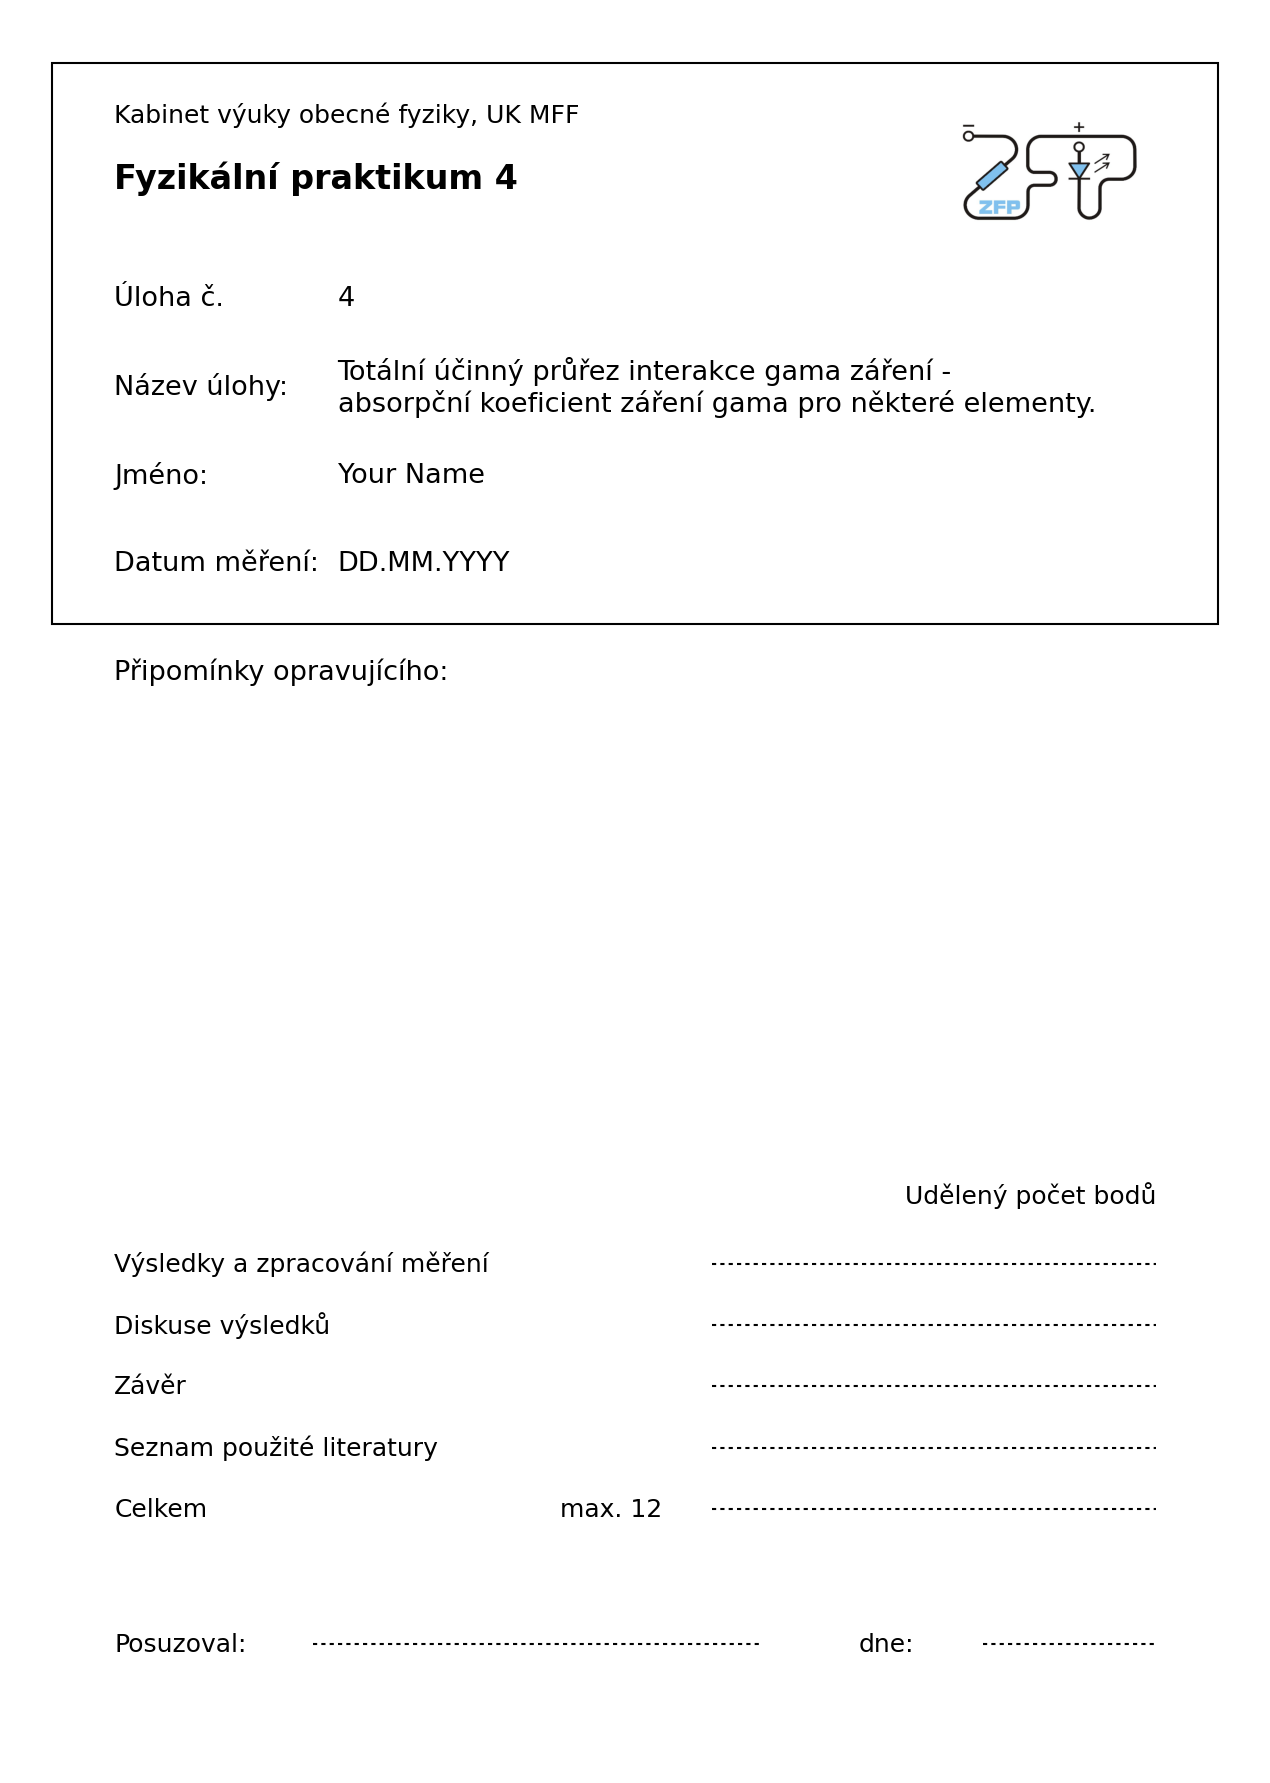

In [1]:
# TODO: Replace the string "Your Name" and "DD.MM.YYYY" with the appropriate values.

from header import header
_ = header(student = "Your Name", date = "DD.MM.YYYY", task_no = 4)

# Total cross-section of gamma radiation interaction - gamma radiation absorption coefficient for certain elements

# Work tasks  

1. Determine the absorption coefficient of $\gamma$ radiation for lead, cadmium, and iron as a function of energy.

2. Determine the half-thickness of the above materials for sufficiently intense transitions of the emitter used.

3. Compare the measured values of the absorption coefficient with the tabulated values for lead, cadmium, and iron.

4. Discuss the influence of individual interactions of $\gamma$ radiation with matter on the measured values in the experimental geometry used.

# Introduction

The process of attenuation of a gamma-ray beam in a medium cannot be considered continuous as is the case for heavy charged particles. In the interaction of a photon with electrons of an atomic shell of a medium, the photon either loses all its energy by the photoelectric effect or by the creation of electron-positron pairs, or part of it by Compton (incoherent) scattering. The creation of electron-positron pairs can naturally also occur in the field of the nucleus. In coherent scattering, the photon does not deposit energy but changes direction. In incoherent scattering, it also changes direction besides the energy loss. For the experiment, the consequence of these interactions is the attenuation of the gamma-ray beam when passing through a layer of material of thickness $t$ according to the relation:
$$
N = N_0 e^{-\mu t},
$$
where $N_0$ is the number of gamma quanta incident on a layer of material of thickness $t$, $N$ is the number of photons with the original energy behind the layer of material, $\mu$ is the absorption coefficient or linear attenuation coefficient with the dimension $\mathrm{mm}^{-1}$.
Since the dependence of the attenuation of the gamma-ray beam on the thickness of the material has an exponential character, there is always a non-zero probability that a gamma quantum will pass through any thickness of any material without interaction.
Thus, for each given energy of incident photons, $E_\gamma$, the free path of individual photons can differ significantly from the mean free path $1/\mu(E_\gamma)$.

The interaction of electromagnetic radiation with matter is very well known. The individual cross-sections as a function of photon energy are, among other things, tabulated [1]. The dependence of the absorption coefficient $\mu$ on the energy of incident photons $E_\gamma$ is shown for lead in the figure below. For specific experiments, it is often more practical to determine the attenuation of the beam experimentally (for a specific detector, geometry, ...) and possibly verify it using a computer simulation by the Monte Carlo method.

$\color{red}{\textbf{Task:}}$ Download the tabulated data. Convert it to the units we use. Note that the tabulated data is in units of $\mathrm{cm}^{2} / \mathrm{g}$. Plot a graph for one element.


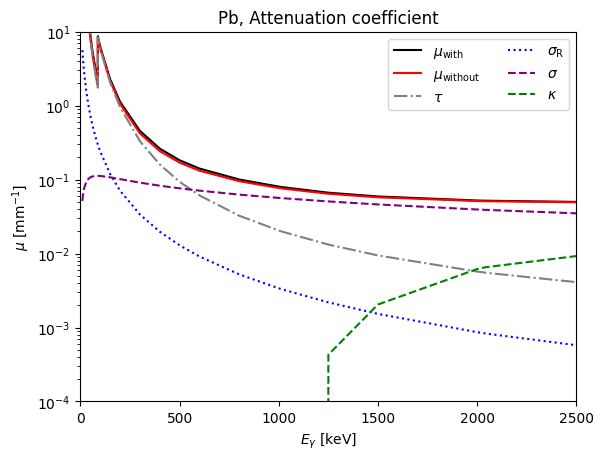

In [2]:
# Solution.

# TODO: Choose the element from the choice of: "Pb", "Fe", "Cd".
element = 'Pb'

# TODO: Finish scales below. Ask the instructor if you need help.
# Each element (Pb, Fe, Cd) should have an entry in the dictionary below.
# Example:
# scale = {'Xe': 5.894e-3 / 10.}
scale = {'Cd': 8.65 / 10, 'Fe': 7.86 / 10, 'Pb': 11.34 / 10}

# TODO: Set maximum of the x-axis range.
# Set it to cover the part of the graph where we perform measurements.
x_max = 2500.

# TODO: Adjust the y-axis range if necessary.
y_min = 1e-4
y_max = 1e1

# Read.
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt

# Directory with theory data files.
DATA_DIR = Path("./data/")   # adjust if needed

# Column names in the data files.
COLS = ['E', 'sigma_R', 'sigma', 'tau', 'kappa_n', 'kappa_e', 'w', 'wo']

# Dictionary to hold DataFrames corresponding to each element we have data for.
dfs = {}

# Read in the theory values, and convert them to units of mm^-1.
# Convert units of E to keV.
for file in sorted(DATA_DIR.glob("*_theory_all.txt")):
    # Extract symbol from filename, e.g. Pb_theory_all.txt → Pb
    m = re.match(r"(?P<sym>[A-Za-z0-9]+)_theory_all\.txt$", file.name)
    symbol = m.group("sym") if m else file.stem

    # Read file (skip text header, ignore last empty column)
    df = pd.read_csv( file, sep=r"\s+", names=COLS, engine="python", usecols=range(8))

    # Convert and compute
    df['E'] *= 1000
    df.loc[:, df.columns != "E"] *= scale.get(symbol, 1.0) # use 1 if scale not defined
    df['kappa_tot'] = df['kappa_n'] + df['kappa_e']

    # Store for later use
    dfs[symbol] = df

# Now you can access them like:
dfs[element].head()

# Plot the curves.
fig, ax = plt.subplots()

ax.plot(dfs[element]['E'], dfs[element]['w'],          label=r'$\mu_\mathrm{with}$',    color='black', linestyle='-')
ax.plot(dfs[element]['E'], dfs[element]['wo'],         label=r'$\mu_\mathrm{without}$', color='red',   linestyle='-')
ax.plot(dfs[element]['E'], dfs[element]['tau'],        label=r'$\tau$',                 color='gray',  linestyle='-.')
ax.plot(dfs[element]['E'], dfs[element]['sigma_R'],    label=r'$\sigma_\mathrm{R}$',    color='blue',  linestyle=':')
ax.plot(dfs[element]['E'], dfs[element]['sigma'],      label=r'$\sigma$',               color='purple',linestyle='--')
ax.plot(dfs[element]['E'], dfs[element]['kappa_tot'],  label=r'$\kappa$',               color='green', linestyle='--')

ax.set_xlabel(r'$E_\gamma\ [\mathrm{keV}]$')
ax.set_ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
ax.set_title(f"{element}, Attenuation coefficient")
ax.legend(ncol=2)

ax.set_yscale('log')
ax.set_ylim(y_min, y_max)
ax.set_xlim(0, x_max)

plt.show()

$\color{red}{\textbf{Solution:}}$ Figure 1: Dependence of the absorption coefficient $\mu$ on the photon energy $E_\gamma$ for $\color{cyan}{\textbf{TODO}}$. The graph distinguishes between the individual processes contributing to the attenuation of the photon beam in the measured energy range, namely the photoelectric effect $\tau$, Compton scattering $\sigma$, coherent or Rayleigh scattering $\sigma_\mathrm{R}$, and electron-positron pair production $\kappa$. The total attenuation of the beam is then described by two curves - including coherent scattering as an attenuating process $\mu_\mathrm{with}$ and without it, $\mu_\mathrm{without}$. The curves are an interpolation of values from [1].

# Measurement

As a source of photons, $^{226}\mathrm{Ra}$ emitter is used. The number of photons transmitted as a function of energy is measured using a semiconductor germanium detector connected to a computer with operating software. The slot in the stand between the emitter and the detector is used to insert layers of individual materials.

The measurement time for each material is set to $\color{cyan}{\textbf{TODO}}$ seconds. The measurement proceeds in the following steps:

- The $^{226}\mathrm{Ra}$ spectrum is measured without any shielding.

  - The resulting spectrum is used for the spectrometer calibration. Energies of the intense $^{226}\mathrm{Ra}$ lines are well known [2,3], and they are assigned to the corresponding peak locations in the spectrum. The spectroscopic software calculates the calibration internally.

  - The spectrum also serves as a measurement for all materials with zero thickness. At least 10 singlet, locally most intense peaks are marked. The peak of the natural background $^{40}\mathrm{K}$ at an energy of about 1461 keV [4] is also marked.

- Twelve more measurements of the spectrum are performed. with the same marked peaks:

  - For four different thicknesses of three different materials - Cd, Pb, Fe.

    - There are several plates of each material that can be gradually stacked in the slot between the radioactive source and the detector.

  - Thanks to this, we get the spectrum measurement for five different thicknesses of the shielding for each material, as the measurement without shielding (i.e. thickness of 0 mm) is also included, and it is common for all materials.

- In each spectrum, at least 10 peaks are identified and the number of events in each peak is determined.

  - The number of events, including uncertainty, in each peak is determined by the software used to control the spectrometer.

    - The number of events in each peak is corrected for the continuum.

  - The software also provides the energy of each peak.

  - The number of events in each peak decreases exponentially with the thickness of the shielding.

    - Recall the formula $N = N_0 e^{-\mu t}$.

    - Recall that the attenuation coefficient is a function of the energy of the photons: $\mu = \mu(E_\gamma)$. The predefined peaks correspond to different photon energies. Thus, we can measure the attenuation coefficient for different energies at the same time.
    
- In each spectrum, there is also the omnipresent 1460 keV peak from the decay of $^{40}\mathrm{K}$.

  - $^{40}\mathrm{K}$ is a common source of background.

  - Being background, photons from $^{40}\mathrm{K}$ decays are coming to the detector from all directions. Therefore, the number of events in the 1460 keV peak is not affected by the thickness of the shielding.


$\color{red}{\textbf{Task:}}$ Load the measured data from text files. Print the data from the unshielded measurements as a table. The data refers to information about the marked peaks, not the spectra themselves. For each peak, the following information is provided:

- peak energy,

- number of events in the peak (and its uncertainty).

In [3]:
# Solution.

# TODO: Specify the name of the data file containing the data
# corresponding to no shielding.
# The file must be located in the `data` subdirectory of the `A4` directory.
# Do not specify the full path, just the file name.
file_no_shielding = '0.txt' # Change the string to the correct file name!

# TODO: Specify the names of all the other data files in the list of strings `files` below.
# The file name format is: element_thickness.suffix, where:
#  - element is one of: Cd, Fe, Pb,
#  - thickness is the thickness of the shielding in 10e-5 m,
#  - suffix is either dat or txt.
# For example:
#  Cd_0106.txt Cd_0214.txt Cd_0322.txt Cd_0428.txt Fe_0500.txt etc.
# All files must be located in the `data` subdirectory of the `A4` directory.
# Do not specify the full path, just the file name.
# Also, no order of the file names is required.
# The file corresponding to no shielding should not be included in the list.
files = ['Cd_0104.txt', 'Cd_0210.txt', 'Cd_0312.txt', 'Cd_0516.txt',
         'Fe_0488.txt', 'Fe_0980.txt', 'Fe_1964.txt', 'Fe_3442.txt',
         'Pb_0104.txt', 'Pb_0200.txt', 'Pb_0318.txt', 'Pb_0426.txt', 'Pb_0936.txt']

import re

def read_data(file, directory = 'data'):
    """
    Read data from a .dat file and store it in a pandas dataframe.

    The data is space-separated with variable number of columns per row.
    Rows with less than 7 columns are padded with NaN values.

    Args:
        file (str): Path to the .dat file to read
        directory (str): Directory where the file is located. Default is 'data'.
        
    Returns:
        pandas.DataFrame: DataFrame containing the parsed data
        
    Note:
        Input file is preprocessed line by line to handle inconsistent column counts
        before being parsed into a DataFrame.
    """

    # Read the file line by line
    with open(f"{directory}/{file}", 'r') as f:
        lines = f.readlines()

    # Preprocess lines to fix "number-number" occurences to "number number"
    fixed_lines = []
    for line in lines:
        line = re.sub(r'(\d+)-(\d+)', r'\1 \2', line)
        fixed_lines.append(line)

    # Save to temporary string or file-like buffer
    from io import StringIO
    buf = StringIO("".join(fixed_lines))

    # Now parse with whitespace delimiter
    data = pd.read_csv(buf, sep=r"\s+", header=None)

    # Drop columns 2–4 (Python index 1:3 inclusive)
    # Keep 1st and 5th–9th (i.e. indices 0,4,5,6,7,8)
    data = data.iloc[:, [0, 4, 5, 6, 7, 8]]

    # Rename the columns of the dataframe to the following:
    data.columns = ['PN', 'E', 'FWHM', 'N', 'dN', 'B']

    return data

# Read the data corresponding to no shielding.
data0 = read_data(file_no_shielding)

# Print data0 to see whether the format is correct.
print(data0.to_string(index=False))

# Read in data from all files specified in the `files` list.
# Store them in a dictionary for easy access later.
# All the dataframes are stored in a dictionary with the keys being Cd, Fe, Pb.
# The values are dictionaries: {thickness: dataframe, thickness: dataframe, ...}
# where thickness is the thickness of the shielding in 10e-5 m and dataframe is the dataframe.
# The thickness is the number in the file name before the .dat extension.
# The dataframe with the no shielding data is stored with the key 0. for each element.
data_dict = {}
for file in files:
    element = file.split('_')[0]
    thickness = int(file.split('_')[-1].split('.')[0]) / 100.
    data = read_data(file)
    if element not in data_dict:
        data_dict[element] = {0. : data0} # Add the data with no shielding.
    data_dict[element][thickness] = data

 PN       E  FWHM       N     dN        B
  1  295.02  1.32 14350.0 432.68 21610.00
  2  351.88  1.28 43560.0 387.45 15790.00
  3  510.19  2.63  4948.0 421.33 15690.00
  4  609.31  1.46 84230.0 445.56 10770.00
  5  768.40  1.58  9383.0 295.51  7333.00
  6  934.28  1.64  5832.0 268.27  6214.00
  7 1120.19  1.70 25300.0 257.46  4032.00
  8 1238.04  1.71  9268.0 226.98  3714.00
  9 1460.81  1.57   549.0 135.70  2233.00
 10 1509.46  1.90  3088.0 227.33  3969.00
 11 1764.49  2.09 20040.0 175.77   932.10
 12 2204.04  2.44  5574.0  98.19   318.00
 13 2447.66  2.31  1583.0  47.78    44.25


$\color{red}{\textbf{Task:}}$ Let us verify that the previously prepared theoretical values of gamma radiation absorption coefficients in Fe, Cd, and Pb from the online database [1] are functional and qualitatively correspond to the measurements. Let's plot the theoretical dependence of the absorption coefficient on gamma radiation energy for each material. The graph should contain two curves for each material - including coherent scattering as an attenuation process and without it.

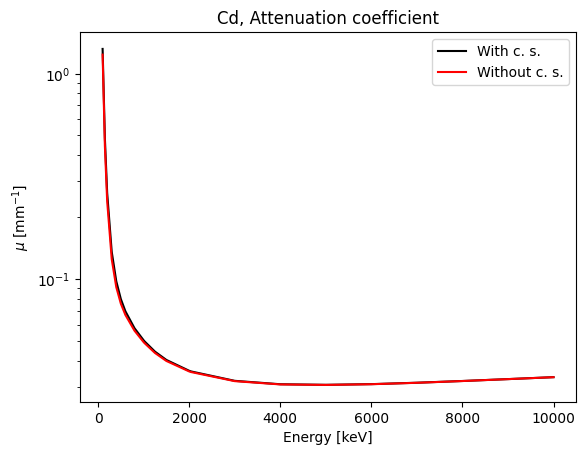

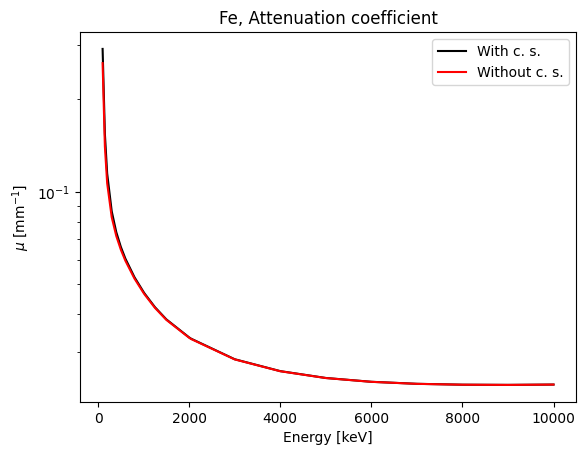

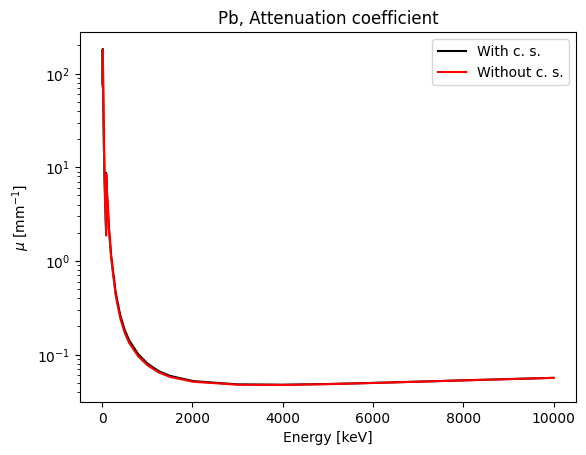

In [4]:
# Solution.

# Read in the data to the theory dictionary, and multiply by the density of the material.
theory = {}
for element in data_dict:
    theory[element] = dfs[element]

# Plot the curves.
for element in theory:
    df = theory[element]
    plt.plot(df['E'], df['w'] , label='With c. s.'   , color='black')
    plt.plot(df['E'], df['wo'], label='Without c. s.', color='red')
    plt.xlabel('Energy [keV]')
    plt.ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
    plt.title(f'{element}, Attenuation coefficient')
    plt.yscale('log')
    plt.legend()
    plt.show()

The following python function may be useful for plotting data along with the fitted curve: 

In [5]:
# Solution.

import matplotlib.pyplot as plt

def plot(x, y, y_err, x_fit, y_fit, xlabel, ylabel, title = ''):

    # draw x, y with error bars
    plt.errorbar(x, y, y_err, fmt = 'o', label = 'Data', color = 'black')

    # draw the fit function and its uncertainty band
    plt.plot(x_fit, y_fit, color = 'red', linewidth = 2, label = 'Fit')

    # revert the order of the legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles = handles[::-1], labels = labels[::-1])

    # labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title != '':
        plt.title(title)

    # show the plot
    plt.show()

    return

$\color{red}{\textbf{Task:}}$ For each shielding material (Fe, Cd, Pb), and for each peak, determine the attenuation coefficient $\mu$:

- Fit the graph of the number of events in the peak, $N$, vs. the shielding thickness.

  - There are five points in the graph: no shielding and four different thicknesses of the shielding.

  - The fit function is $N = N_0 e^{-\mu t}$.

  - Plot the data and the fitted curve for two representative peaks of your choice for each material.

- Store the attenuation coefficient $\mu$, and the corresponding energy for each peak.

  - E.g. in a dictionary with the energy as the key and the attenuation coefficient as the value.

/tmp/ipykernel_996162/497959054.py:16: RuntimeWarning: overflow encountered in exp
  return N0 * np.exp(-mu * x)


<IPython.core.display.Latex object>

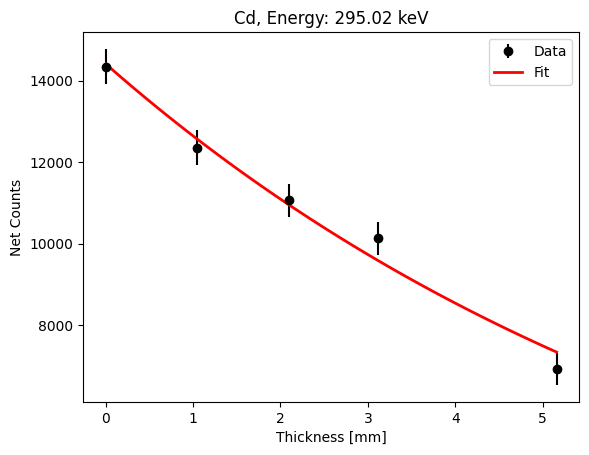

<IPython.core.display.Latex object>

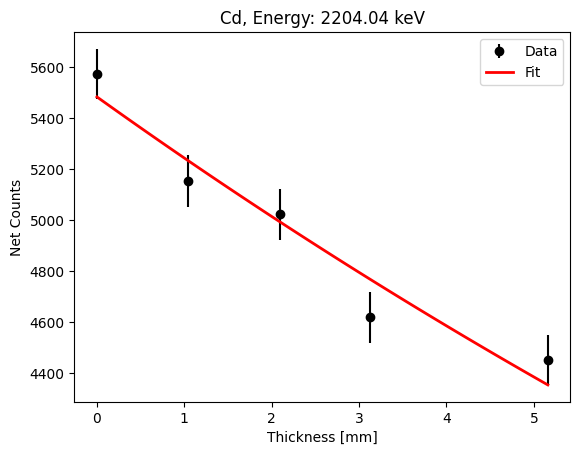

<IPython.core.display.Latex object>

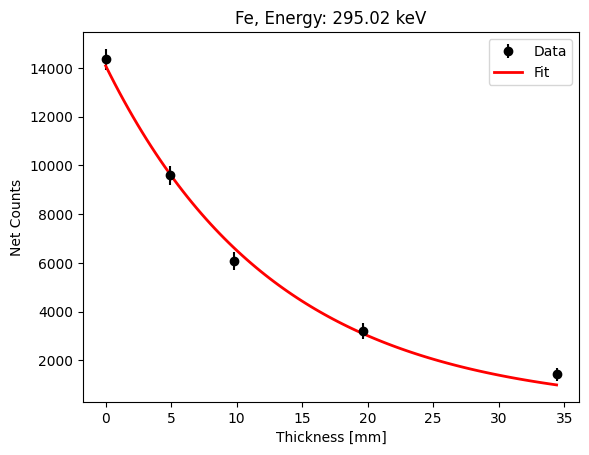

<IPython.core.display.Latex object>

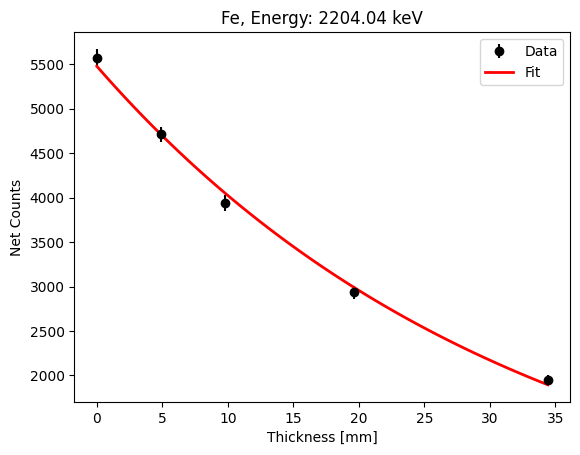

<IPython.core.display.Latex object>

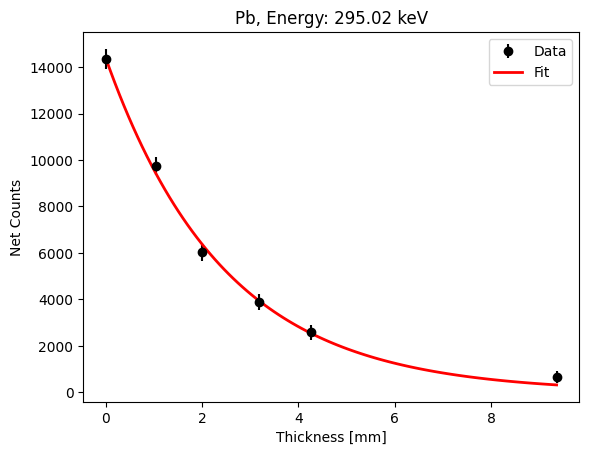

<IPython.core.display.Latex object>

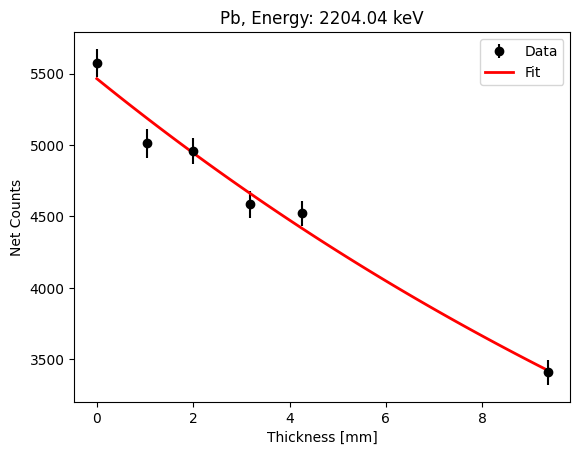

In [6]:
# Solution.

# Using the exponential, determine the linear attenuation coefficient value, mu (in mm^-1).
# Also find its uncertainty, mu_unc.
# The fit function form is: N = N0 * exp(-mu * thickness),
# where N is the net counts in a peak, N0 corresponds to counts with no shielding, and thickness is the thickness of the shielding.
# The mu values and their uncertainties should be stored in the dictionary fit_results.

import numpy as np
from scipy.optimize import curve_fit
import uncertainties
from IPython.display import display, Latex

# Define the exponential fit function.
def fit_func(x, mu, N0):
    return N0 * np.exp(-mu * x)

# Fit_results stores the fitted mu values and their uncertainties.
# Keys of the dictionary are the elements, e.g. 'Pb'.
# Values are dictionaries with keys being the energies of the peaks (in keV).
# The dictionary correlations stores just the correlation coefficients between mu and N0 for each fit.
fit_results = {element : {} for element in data_dict}
correlations = {element : {} for element in data_dict}

# Remove the row with the potassium 40 background peak (E = 1461 keV) from all dataframes.
# Technically, remove all rows with energies between 1450 and 1470 keV.
data_dict_fit = {element: {} for element in data_dict}
for element in data_dict:
    for thickness in data_dict[element]:
        data_dict_fit[element][thickness] = data_dict[element][thickness][~data_dict[element][thickness]['E'].between(1450, 1470)]


# Perform all fits: for each element and each peak (row in the dataframe).
for element in data_dict_fit:

    # Read in the thickness values and sort them.
    thickness = np.array(sorted(data_dict_fit[element].keys()))

    # Run over all rows in the dataframe corresponding to no shielding.
    # The number of rows should be the same in all files.
    for irow in range(len(data_dict_fit[element][0.])):

        # Check the energy of the peak.
        energy = data_dict_fit[element][0.].iloc[irow]['E']
        
        # Number of events in the peak and its uncertainty; read it for all thicknesses.
        N      = np.array([data_dict_fit[element][t].iloc[irow]['N'] for t in thickness])
        dN     = np.array([data_dict_fit[element][t].iloc[irow]['dN'] for t in thickness])

        # Perform the fit.
        # If the fit fails, skip this peak, but print which one failed.
        try:
            nom, cov = curve_fit(fit_func, thickness, N, sigma=dN, absolute_sigma=True)
            mu, N0 = uncertainties.correlated_values(nom, cov)
        except:
            print(f"Fit failed for {element}, energy {energy} keV")
            continue
    
        # Store the fit result
        fit_results[element][energy] = mu
        correlations[element][energy] = cov[0,1] / (np.sqrt(cov[0,0]) * np.sqrt(cov[1,1]))

        # Prepare the fit function for plotting
        x = np.linspace(thickness.min(), thickness.max(), 100)
        y_fit      = fit_func(x, mu.nominal_value, N0.nominal_value)

        # Plot the data and the fit function for a few selected peaks.
        # Select the peaks by their energy.
        title = f'{element}, Energy: {data_dict_fit[element][0.].iloc[irow]["E"]} keV'
        if irow in [0, 10]: # TODO select good examples of the fits
            display(Latex(fr'{title}\
                            $ \quad \mu = {mu:.1uS}~\mathrm{{mm}}^{{-1}} \quad\
                            N_0 = {N0:.3uS} \quad\
                            \mathrm{{cor}}(\mu,N_0) = {correlations[element][energy]:.3g}$'))
            plot(thickness, N, dN, x, y_fit, 'Thickness [mm]', 'Net Counts', title)

$\color{red}{\textbf{Task:}}$ Print a table with the attenuation coefficients for each energy and each material. Also include the half-value layer (HVL), $t_{1/2}$, for each energy and each material. The HVL is defined as the thickness of the material that reduces the intensity of the gamma-ray beam to half of its initial value. The HVL can be calculated as:
$$
t_{1/2} = \frac{\ln(2)}{\mu}.
$$

In [7]:
# Solution:
# Python DataFrame is suitable for presenting the results.

df = pd.DataFrame(fit_results)
df = df.rename_axis('Energy [keV]').reset_index()

for element in data_dict:
    df[f't_1/2_{element} [mm]'] = np.log(2) / df[element]

df = df.rename(columns={'Cd': 'mu_Cd [mm^-1]', 'Fe': 'mu_Fe [mm^-1]', 'Pb': 'mu_Pb [mm^-1]'})
print(df)

    Energy [keV]    mu_Cd [mm^-1]    mu_Fe [mm^-1]    mu_Pb [mm^-1]  \
0         295.02    0.131+/-0.011    0.077+/-0.004    0.407+/-0.019   
1         351.88  0.1039+/-0.0028  0.0745+/-0.0011    0.292+/-0.004   
2         510.19    0.020+/-0.022    0.044+/-0.006    0.079+/-0.015   
3         609.31  0.0638+/-0.0015  0.0588+/-0.0005  0.1210+/-0.0012   
4         768.40    0.057+/-0.009  0.0527+/-0.0028    0.083+/-0.006   
5         934.28    0.065+/-0.014    0.049+/-0.004    0.075+/-0.009   
6        1120.19  0.0481+/-0.0029  0.0447+/-0.0007  0.0660+/-0.0018   
7        1238.04    0.052+/-0.007  0.0408+/-0.0016    0.057+/-0.004   
8        1509.46    0.041+/-0.020    0.035+/-0.004    0.034+/-0.011   
9        1764.49  0.0356+/-0.0023  0.0344+/-0.0005  0.0472+/-0.0014   
10       2204.04    0.045+/-0.005  0.0308+/-0.0009  0.0499+/-0.0031   
11       2447.66    0.036+/-0.009  0.0280+/-0.0014    0.040+/-0.005   

   t_1/2_Cd [mm] t_1/2_Fe [mm]  t_1/2_Pb [mm]  
0      5.3+/-0.4     9.0+/-0

$\color{red}{\textbf{Task:}}$ For each material, plot the attenuation coefficient as a function of the energy of gamma rays.

- Plot the theoretical values of the attenuation coefficients on the same graph.

  - Two curves: with coherent scattering included as an attenuating process and without it.

- Display the measured values as points, and their uncertainties as vertical error bars.

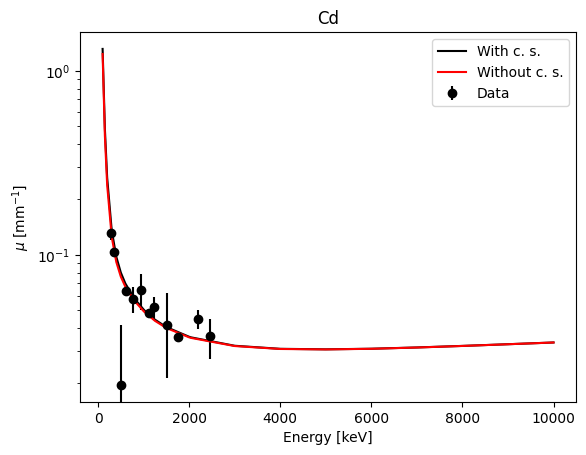

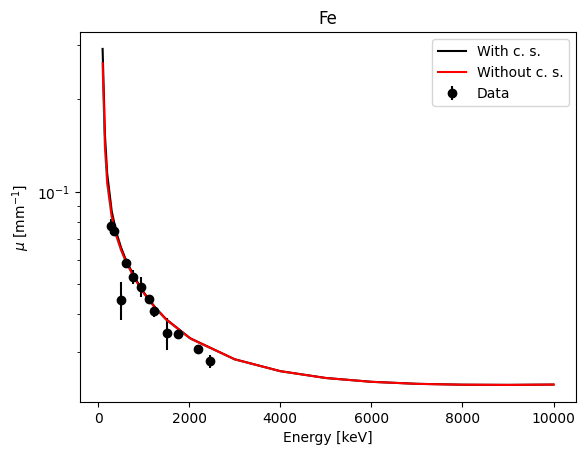

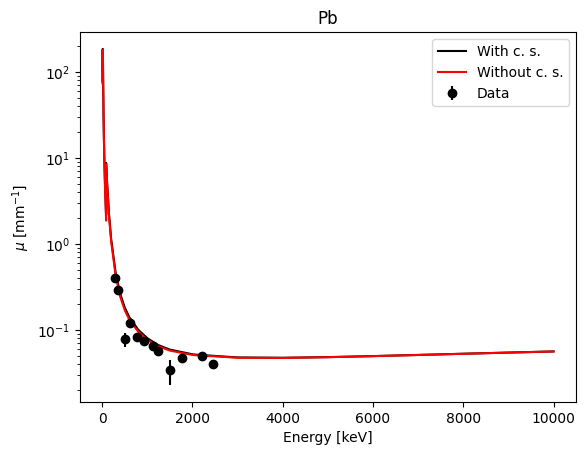

In [8]:
# Solution:
maxY = {'Cd': 0.15, 'Fe': 0.1, 'Pb': 0.45} #TODO adjust if need be

for element in fit_results:

    energies = np.array(sorted(fit_results[element].keys()))
    # Remove array elements around 1460 from energies (the potassium-40 peak)
    energies = np.delete(energies, np.where((energies > 1450) & (energies < 1470)))
    # TODO think about removing any other peaks. If you do so, explain later why.

    # Plot the data.
    mus = np.array([fit_results[element][e].nominal_value for e in energies])
    mus_unc = np.array([fit_results[element][e].std_dev for e in energies])
    plt.errorbar(energies, mus, mus_unc, fmt='o', label='Data', color='black')

    # Plot the theory curves.
    df = theory[element]
    plt.plot(df['E'], df['w'] , label='With c. s.'   , color='black')
    plt.plot(df['E'], df['wo'], label='Without c. s.', color='red')

    # Labels etc.
    plt.xlabel('Energy [keV]')
    plt.ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
    plt.yscale('log')
    # TODO plot only relevant ranges
    # plt.xlim()
    # plt.ylim(0,maxY.get(element,0.5))
    plt.title(f'{element}')
    plt.legend()
    plt.show()

$\color{red}{\textbf{Task:}}$ Discuss the results:

- Compare the measured and theoretical values of the attenuation coefficients.

- Discuss the uncertainty determination of the measured values.

  - Are some effects neglected in the uncertainty determination?

    - Discuss the influence of the apparatus geometry on the measurement results (in relation to any possible systematic trends in the measured values).

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ For the $^{40}\mathrm{K}$ background peak (1461 keV):

- Make a graph of the number of events in the peak as a function of the thickness of the shielding.
  
- Fit the graph with a constant function.

Found peak at energy 1460.81 keV


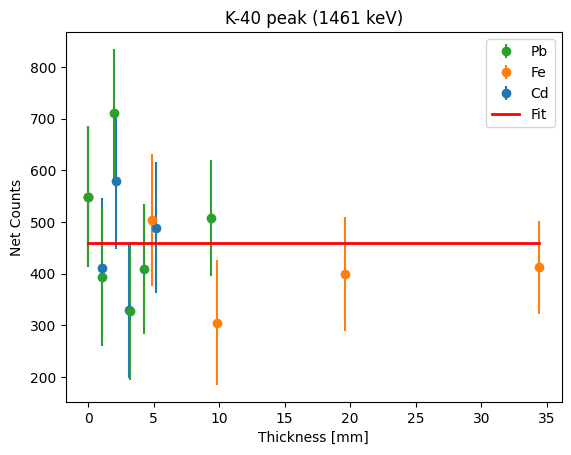

K-40 peak (1461 keV) fit result: c = 459(31)


In [9]:
# Solution

import matplotlib as mpl

# Check the index of the row with the potassium 40 peak, based on the energy.
idx = data_dict['Cd'][0.][data_dict['Cd'][0.]['E'].between(1450, 1470)].index[0]

# Check if we found the correct peak by printing its energy
print(f"Found peak at energy {data_dict['Cd'][0.].loc[idx, 'E']} keV")

# For the fitting, all data points from all elements are combined.
all_N = np.array([])
all_thickness = np.array([])
all_dN = np.array([])

# Read N vs thickness values for the potassium 40 peak for each material.
for element in data_dict:

    # Read in the values.
    thickness = np.array(sorted(data_dict[element].keys()))
    N = np.array([data_dict[element][t].loc[idx, 'N'] for t in thickness])
    dN = np.array([data_dict[element][t].loc[idx, 'dN'] for t in thickness])

    # Plot the data points for each element.
    plt.errorbar(thickness, N, yerr = dN, fmt = 'o', label = element)

    # Add the data points to the arrays for the fit.
    all_N = np.concatenate((all_N, N))
    all_thickness = np.concatenate((all_thickness, thickness))
    all_dN = np.concatenate((all_dN, dN))

# Define the fit function (a constant).
# Note that the term 0*x is there for numpy broadcasting to work properly.
def fit_func(x, c):
    return c + 0 * x

# Perform the fit.
nom, cov = curve_fit(fit_func, all_thickness, all_N, sigma = all_dN, absolute_sigma = True)
c = uncertainties.ufloat(nom[0], np.sqrt(cov[0, 0]))

# Plot the fit result.
x = np.linspace(0, max(all_thickness), 100)
plt.plot(x, fit_func(x, c.nominal_value), color = 'red', linewidth = 2, label = 'Fit')

# Labels and title.
plt.xlabel('Thickness [mm]')
plt.ylabel('Net Counts')
plt.title('K-40 peak (1461 keV)')

# Legend. Revert the default order of the legend items.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles[::-1], labels = labels[::-1])

# Show the plot.
plt.show()

# Print the fit result
print(f'K-40 peak (1461 keV) fit result: c = {c:.2uS}')

$\color{red}{\textbf{Task:}}$ Discuss the results obtained for the $^{40}\mathrm{K}$ background peak (1461 keV).

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ Write a conclusion.

# Conclusion

-> conclude here <-

# Literatura

[1] M. J. Berger, *et al.*, XCOM: Photon Cross Sections Database (2010). The National Institute of Standards and Technology (NIST). DOI:10.18434/T48G6X, dostupné na https://www.nist.gov/pml/xcom-photon-cross-sections-database.

[2] B. Singh, M. S. Basunia, J. Chen, et al., Nuclear Structure and Decay Data for A = 222 Isobars, Nucl.
Data Sheets 192 (2023) 315–421, DOI:10.1016/j.nds.2023.10.002, dostupné na https://www.nndc.bnl.gov/ensdf/.

[3] S. Zhu and E. A. McCutchan, Nuclear Data Sheets for A=214, Nucl. Data Sheets 175 (2021) 1–149, DOI:10.1016/j.nds.2021.06.001,
dostupné na https://www.nndc.bnl.gov/ensdf/.

[4] J. Chen, Nuclear Data Sheets for A=40, Nucl. Data Sheets 140 (2017) 1–376, DOI:10.1016/j.nds.2017.02.001, dostupné na
https://www.nndc.bnl.gov/ensdf/.